# Задача 1.
# Исследовать качество работы классификаторы в зависимости от выбранного метода преобразования данных
# Изучить методы преобразования данных: from sklearn.preprocessing https://scikit-learn.org/stable/modules/preprocessing.html
# Критерий качества - accuracy
# Сформировать таблицу для сравнения

In [23]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    Normalizer
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import pandas as pd

In [24]:
# Загрузка Ирисов
iris = load_iris()
X, y = iris.data, iris.target

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Определение методов предобработки
preprocessors = {
    'Без предобработки': None,
    'Стандартизация': StandardScaler(),
    'Масштабирование': MinMaxScaler(),
    'Робастное масштабирование': RobustScaler(),
    'Нормализация': Normalizer()
}

In [27]:
# Оценка классификаторов
results = []

for name, preprocessor in preprocessors.items():
    # Создание конвейера обработки
    if preprocessor is None:
        pipeline = Pipeline([
            ('classifier', LogisticRegression(max_iter=1000))
        ])
    else:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(max_iter=1000))
        ])

    # Обучение и прогнозирование
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Расчет точности
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Метод предобработки': name, 'Accuracy': accuracy})

In [28]:
# Создание DataFrame
results_df = pd.DataFrame(results)
results_df.set_index('Метод предобработки', inplace=True)

In [29]:
# Вывод результатов
print(results_df)

                           Accuracy
Метод предобработки                
Без предобработки          1.000000
Стандартизация             1.000000
Масштабирование            0.911111
Робастное масштабирование  1.000000
Нормализация               0.866667


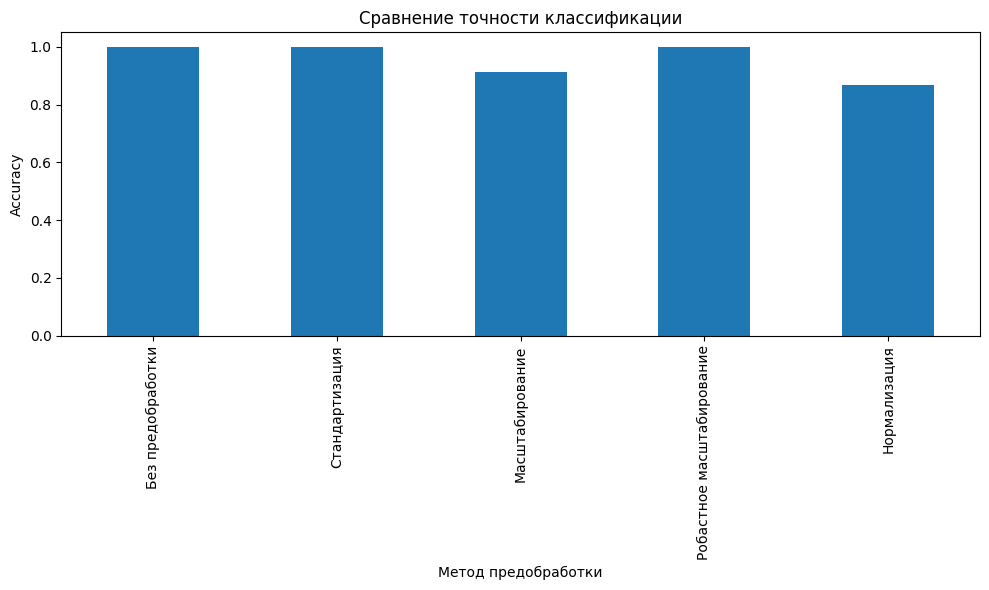

In [30]:
# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
results_df['Accuracy'].plot(kind='bar')
plt.title('Сравнение точности классификации')
plt.xlabel('Метод предобработки')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()